In [1]:
import cv2
from matplotlib import pyplot as plt

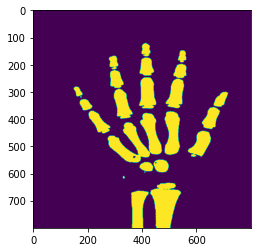

In [2]:
plt.imshow(cv2.imread('preds.png',0))

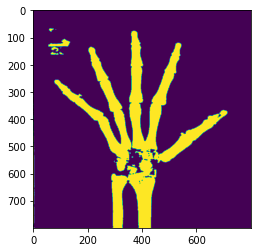

In [3]:
plt.imshow(cv2.imread('preds_val.png',0))

In [4]:
from keras.models import load_model
model = load_model('models/bone_annotation_c3.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-10 20:01:42.058828: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-10 20:01:42.059100: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model

In [6]:
from glob import glob
import cv2
test = glob('./Test/*')

test[:20]

['./Test/016_M.jpg',
 './Test/14_F.jpg',
 './Test/015_M.jpg',
 './Test/15_F.jpg',
 './Test/018_M.jpg']

In [7]:
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

X_test = np.zeros((len(test),800,800,3), dtype= np.uint8)
sizes_test = []
for n, id_ in tqdm(enumerate(test), total = len(test)):
    img_ = cv2.imread(id_)
    img = resize(img_, (800,800), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('Done')

100%|██████████| 5/5 [00:00<00:00,  5.23it/s]

Done


In [8]:
preds_test = model.predict(X_test, verbose =1)

2022-04-10 20:01:45.569653: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-10 20:01:45.703230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 758ms/step


1/1 [==============================] - 0s 28ms/step


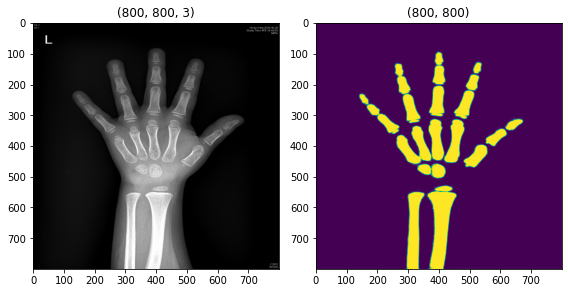

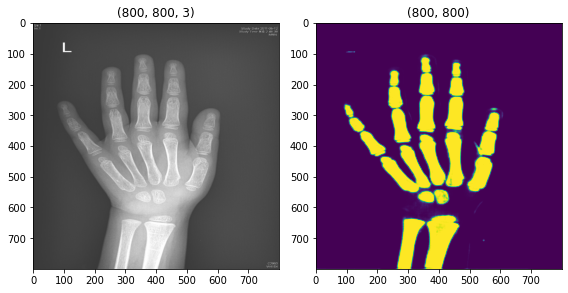

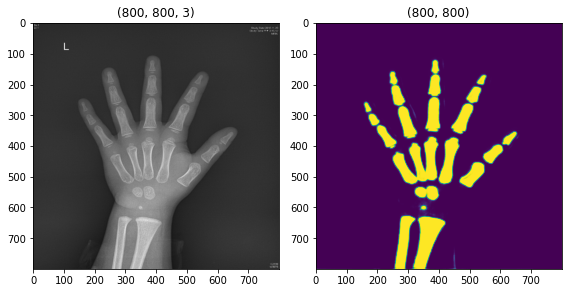

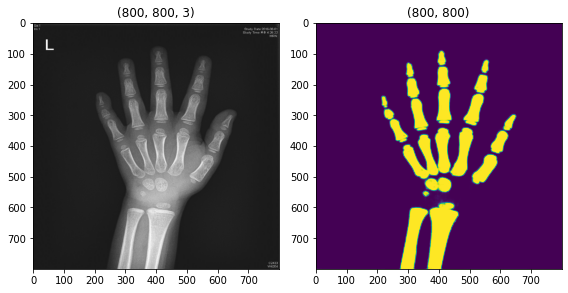

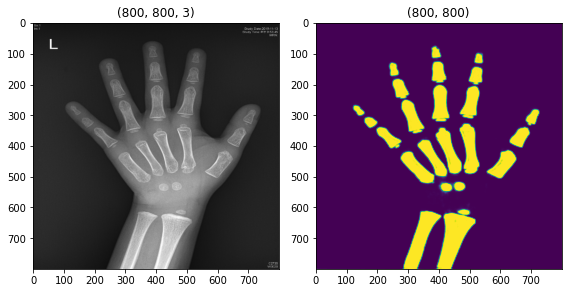

In [9]:

preds_test = model.predict(X_test, verbose =1)

for i in range(5):
    img_1 = X_test[i]
    img_2 = np.squeeze(preds_test[i])
    # img_3 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
    # img_4 = cv2.bitwise_and(img_3,img_3, mask=img_2)
    f, ax = plt.subplots(1, 2, figsize=(8,8))
    ax[0].imshow(img_1)
    ax[0].set_title(img_1.shape)
    ax[1].imshow(img_2)
    ax[1].set_title(img_2.shape)
    # ax[2].imshow(img_3)
    # ax[2].set_title(img_3.shape)
    # ax[3].imshow(img_4)
    # ax[3].set_title(img_4.shape)
    f.tight_layout()
    plt.show()

Text(0.5, 1.0, '(800, 800)')

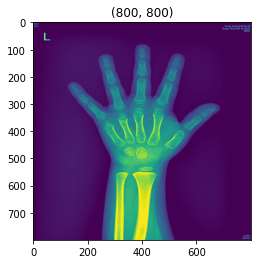

In [119]:
img_3 = cv2.cvtColor(X_test[0],cv2.COLOR_BGR2GRAY)
# img = img.astype(np.uint8)
img_3 = img_3.astype(np.uint8)
plt.imshow(img_3)
plt.title(img_3.shape)

In [10]:
img = X_test[0]
pred = preds_test[0]

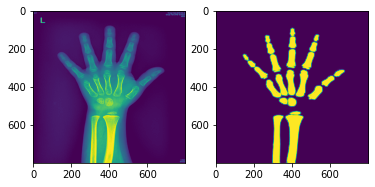

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.imshow(gray)
plt.subplot(122)
plt.imshow(pred)

In [22]:
import numpy as np
pred_ = pred.astype(np.uint8)

In [74]:
print(pred.shape)
print(img.shape)

(800, 800, 1)
(800, 800, 3)


In [75]:
mask = np.squeeze(pred)

# Trial2

In [17]:
from keras_bone_unet_jacard import simple_unet_model_with_jacard  
from simple_unet import simple_unet_model  
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from tqdm import tqdm



#### ##############################
image_directory = 'trial2_dataset/imgs/'
mask_directory = 'trial2_dataset/mask/'

SIZE = 256
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

images = glob(f'{image_directory}*.jpg')
for i, image_path in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    image = cv2.imread(image_path, 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    image_dataset.append(np.array(image))

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

masks = glob(f'{mask_directory}*.png')
for i, image_path in enumerate(masks):
    image = cv2.imread(image_path, 0)
    image = Image.fromarray(image)
    image = image.resize((SIZE, SIZE))
    mask_dataset.append(np.array(image))


#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
#D not normalize masks, just rescale to 0 to 1.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.



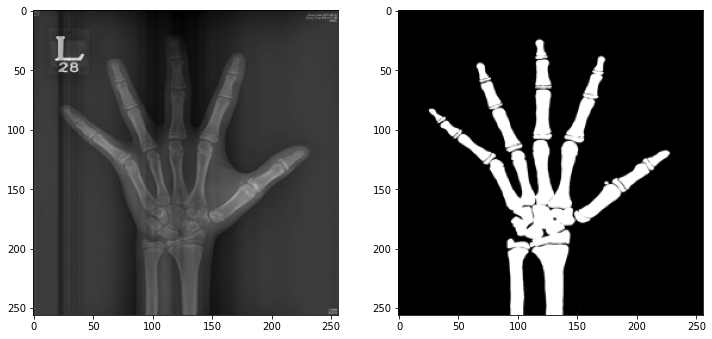

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)

X_train_quick_test, X_test_quick_test, y_train_quick_test, y_test_quick_test = train_test_split(X_train, y_train, test_size = 0.9, random_state = 0)

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train_quick_test))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train_quick_test[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train_quick_test[image_number], (256, 256)), cmap='gray')
plt.show()

In [21]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_jacard_model():
    return simple_unet_model_with_jacard(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model_jacard = get_jacard_model()

def get_standard_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model_standard = get_standard_model()

#If starting with pre-trained weights. 
#model.load_weights('mitochondria_with_jacard_50_epochs.hdf5')

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 256, 256, 16  160         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_45 (Dropout)           (None, 256, 256, 16  0           ['conv2d_95[0][0]']              
                                )                                                           

In [22]:
model_jacard = simple_unet_model_with_jacard(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_133 (Conv2D)            (None, 256, 256, 16  160         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_63 (Dropout)           (None, 256, 256, 16  0           ['conv2d_133[0][0]']             
                                )                                                           

In [23]:
model_standard

In [24]:
model_jacard

In [ ]:
history_jacard = model_jacard.fit(X_train_quick_test, y_train_quick_test, 
                    batch_size = 12,
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

history_standard = model_standard.fit(X_train_quick_test, y_train_quick_test, 
                    batch_size = 2, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

model_jacard.save('mitochondria_with_jacard.hdf5')
model_standard.save('mitochondria_standard.hdf5')

In [27]:
_, acc = model_jacard.evaluate(X_test, y_test)
print("Accuracy of Jacard Model is = ", (acc * 100.0), "%")

	# evaluate model
_, acc = model_standard.evaluate(X_test, y_test)
print("Accuracy of Standard Model is = ", (acc * 100.0), "%")

1/1 [==============================] - 0s 59ms/step - loss: -0.2352 - jacard_coef: 0.2352
Accuracy of Jacard Model is =  23.524335026741028 %
1/1 [==============================] - 0s 111ms/step - loss: 0.2047 - accuracy: 0.7877
Accuracy of Standard Model is =  78.77146601676941 %


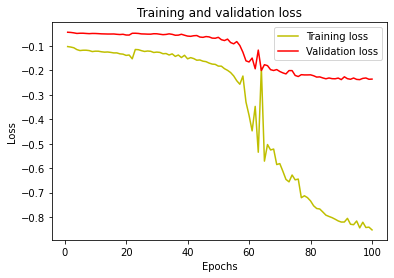

In [28]:
loss = history_jacard.history['loss']
val_loss = history_jacard.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

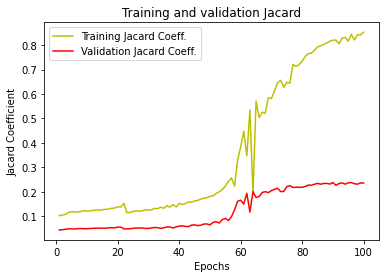

In [29]:
jc = history_jacard.history['jacard_coef']
#acc = history.history['accuracy']
val_jc = history_jacard.history['val_jacard_coef']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, jc, 'y', label='Training Jacard Coeff.')
plt.plot(epochs, val_jc, 'r', label='Validation Jacard Coeff.')
plt.title('Training and validation Jacard')
plt.xlabel('Epochs')
plt.ylabel('Jacard Coefficient')
plt.legend()
plt.show()


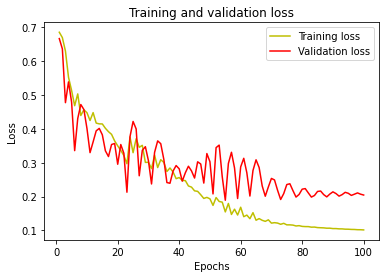

In [30]:
loss = history_standard.history['loss']
val_loss = history_standard.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

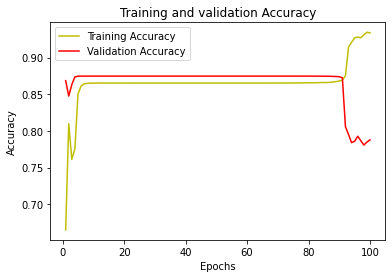

In [31]:
acc = history_standard.history['accuracy']
#acc = history.history['accuracy']
val_acc = history_standard.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
model = model_jacard  #Assign model to one of the models instead of changing the entire code for testing. 
#model = model_standard  #Assign model to one of the models instead of changing the entire code for testing. 

#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)


IoU socre is:  0.4889107433532284


2022-04-11 20:28:41.949326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

In [40]:
test_img_other = cv2.imread('trial1_dataset/Test/14_F.jpg', 0)
test_img_other = cv2.resize(test_img_other,(256,256))
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

In [41]:
test_img_other_input.shape

(1, 256, 256, 1)

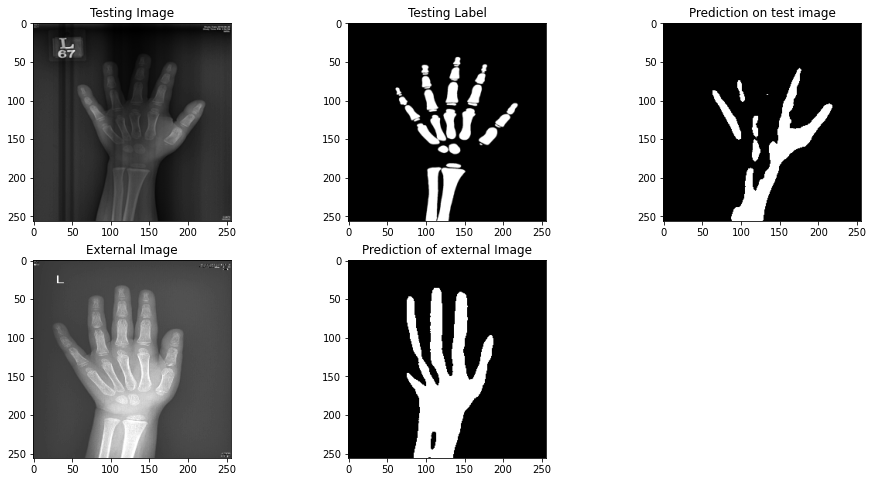

In [42]:
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.5).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()